# Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


In [2]:
file_path = r"CustomerChurn_PredictionData.xlsx"

sheet_name1 = "vw_ChurnData"

data = pd.read_excel(file_path, sheet_name=sheet_name1)

In [3]:
df = pd.DataFrame(data)

In [4]:
print(df.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12266-HAR  Female   46      No         Haryana                    2   
1   12272-WES    Male   66      No     West Bengal                    9   
2   12281-RAJ    Male   80      No       Rajasthan                   14   
3   12296-MAD    Male   65     Yes  Madhya Pradesh                   14   
4   12303-BIH  Female   56      No           Bihar                    7   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 5        NaN           Yes            Yes  ...   
1                 8        NaN            No             No  ...   
2                25        NaN           Yes            Yes  ...   
3                 2        NaN            No             No  ...   
4                14        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      79.650002   3870.300049           0.0   
1      Cre

Data Processing

In [5]:
#Drop columns that wont be used for prediction
df = df.drop(['Customer_ID','Churn_Category','Churn_Reason'], axis=1,  errors='ignore')


#List of columns to be label encoded
columns_to_encode = [
    'Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines',
    'Internet_Service','Internet_Type','Online_Security','Online_Backup',
    'Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies',
    'Streaming_Music','Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

#Encode categorical variables except the taget variable

label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

#Manually encode the target variable -> 'Customer Status'
df['Customer_Status'] = df['Customer_Status'].map({'Stayed':0, 'Churned':1})

#Split data into features and target
x = df.drop('Customer_Status', axis=1)

y = df['Customer_Status']


#Split data into trainig and testing

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)







In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(x_train,y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Confusion Matrix
[[802  49]
 [131 220]]
classification_report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       851
           1       0.82      0.63      0.71       351

    accuracy                           0.85      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.85      0.85      0.84      1202



C:\Users\Admin\AppData\Local\Temp\ipykernel_16972\174019761.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices],y=x.columns[indices],palette="Set2")


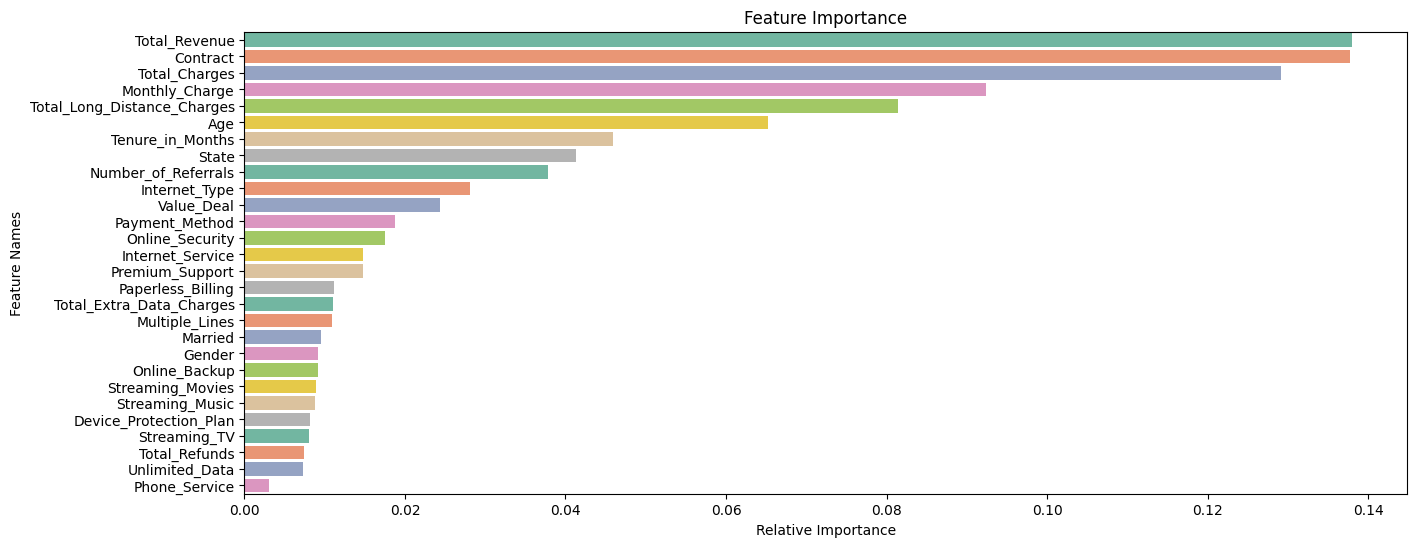

In [8]:
y_pred = model.predict(x_test)

#Evaluate the model

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("classification_report")
print(classification_report(y_test,y_pred))


#Featue selection using feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


#Plot the featue importance

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=x.columns[indices],palette="Set2")
plt.title('Feature Importance')
plt.xlabel("Relative Importance")
plt.ylabel("Feature Names")
plt.show()

In [9]:
# Predict on new Data

file_path = r"C:\Users\Admin\OneDrive\Desktop\Machine Learning\RandomForestPBI_prj_Analysis\CustomerChurn_PredictionData.xlsx"
sheet_name2 = "vw_JoinData"

new_data = pd.read_excel(file_path, sheet_name=sheet_name2)
print(new_data.head())

original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Reason'], axis=1, errors='ignore')

# Encode categorical columns
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        known_classes = label_encoders[column].classes_
        if not new_data[column].isin(known_classes).all():
            print(f"Unknown categories found in column: {column}")
            print(new_data[~new_data[column].isin(known_classes)][column].unique())
        new_data[column] = label_encoders[column].transform(new_data[column])
    else:
        # Drop column if it wasn't part of training
        print(f"Dropping column not in training: {column}")
        new_data = new_data.drop(column, axis=1)

# Predict
new_predictions = model.predict(new_data)

# Attach predictions
original_data['Customer_Status'] = new_predictions

# Keep only churned customers (status == 1)
original_data = original_data[original_data['Customer_Status'] == 1]

# Save results as Excel
output_path = r"C:\Users\Admin\OneDrive\Desktop\Power BI\PBI_Project\Telecom_Customer_Churn_Analysis\CustomerChurn_PredictionDataResult.xlsx"
original_data.to_excel(output_path, index=False)

print(f"Results saved to: {output_path}")





  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   12340-DEL  Female   51     Yes           Delhi                    0   
1   12469-AND    Male   24     Yes  Andhra Pradesh                   11   
2   14567-TAM    Male   43      No      Tamil Nadu                    1   
3   15349-UTT    Male   47     Yes   Uttar Pradesh                    9   
4   17796-BIH  Female   65      No           Bihar                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                10        NaN           Yes             No  ...   
1                 4        NaN           Yes             No  ...   
2                 9        NaN           Yes             No  ...   
3                12     Deal 5           Yes            Yes  ...   
4                 1        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      62.799999     62.799999           0.0   
1      Cre